# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


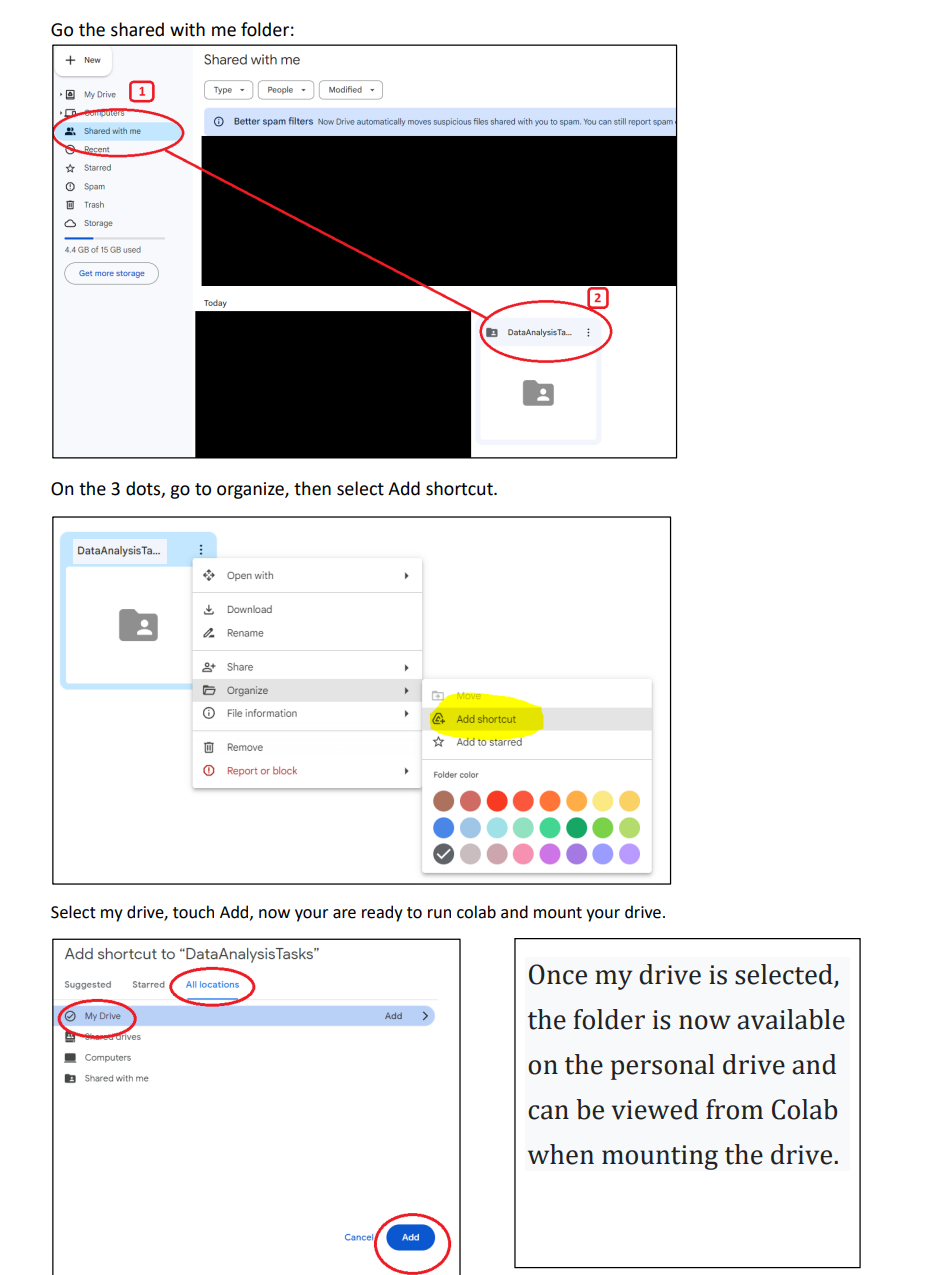

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








Mounted at /content/gdrive


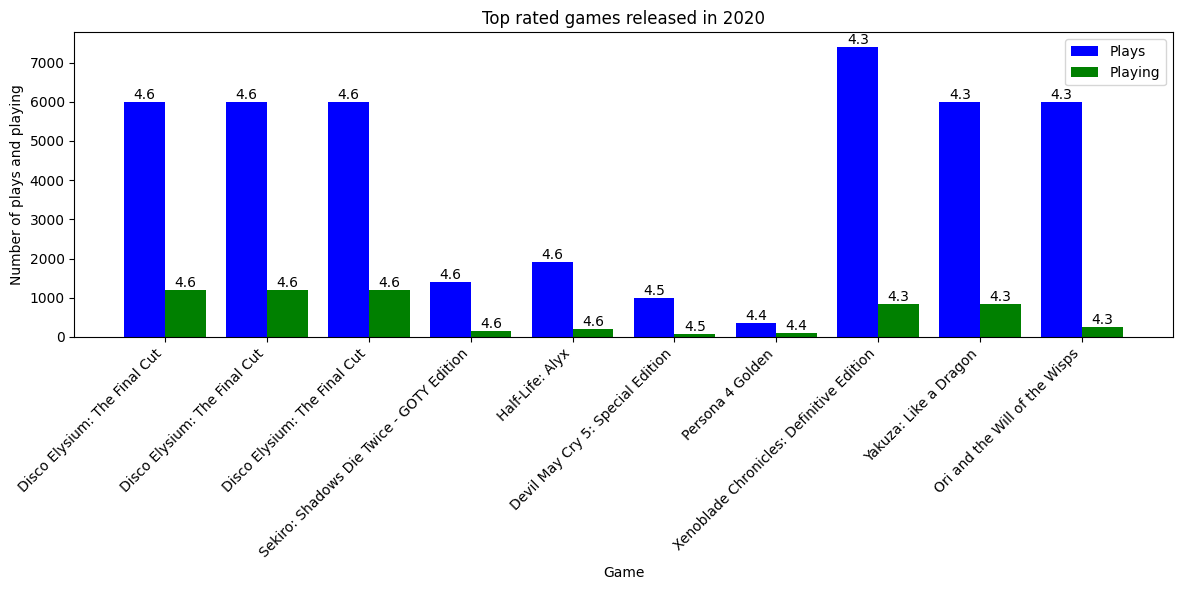

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/popular_video_games.csv")

# Convert Release Date to datetime and extract year and handle errors
df['Release Date'] = pd.to_datetime(df['Release Date'], format="%b %d, %Y", errors='coerce')
df['Release Year'] = df['Release Date'].dt.year

# Filter out rows with invalid release dates
df = df[pd.notna(df['Release Date'])]

# Filter games that is released in 2020
df = df[df['Release Year'] == 2020]

# Convert string column to numeric values
def convert_into_numeric(data):
    if 'K' in data:
        return float(data.replace('K', '')) * 1000
    else:
        return float(data)

# Convert number of plays, and playing into numeric
df['Plays'] = df['Plays'].copy().apply(convert_into_numeric)
df['Playing'] = df['Playing'].copy().apply(convert_into_numeric)

# Get top rated games of all time
top_games = df.nlargest(10, 'Rating')

# Create a bar chart with two bars for each game
plt.figure(figsize=(12, 6))

# Create a list of indices for the x-axis
x_indices = range(len(top_games))

# Create the first bar (Plays)
plays_bars = plt.bar(x_indices, top_games['Plays'], width=0.4, color='blue', label='Plays')

# Create the second bar (Playing)
playing_bars = plt.bar([x + 0.4 for x in x_indices], top_games['Playing'], width=0.4, color='green', label='Playing')

# Set x-axis labels and title
plt.xlabel('Game')
plt.ylabel('Number of plays and playing')
plt.title('Top rated games released in 2020')
plt.xticks([x + 0.4/2 for x in x_indices], top_games['Title'], rotation=45, ha='right')

# Add legend
plt.legend()

# Show rating on top of each bar
for bar, rating in zip(plays_bars, top_games['Rating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.1f}', ha='center', va='bottom', color='black', fontsize=10)

for bar, rating in zip(playing_bars, top_games['Rating']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rating:.1f}', ha='center', va='bottom', color='black', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()